In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
train = pd.read_csv('Train.csv')

In [18]:
test = pd.read_csv('Test.csv')

In [19]:
train.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


**Deleting the parameters which are not utilised as per the question**

In [20]:
train = train.drop(['ID','industry_code','occupation_code','household_stat','veterans_admin_questionnaire','mig_year','country_of_birth_own','country_of_birth_father',
             'country_of_birth_mother','migration_code_change_in_msa','migration_prev_sunbelt','migration_code_move_within_reg','migration_code_change_in_reg',
             'old_residence_reg','importance_of_record'],axis=1)

In [21]:
test = test.drop(['ID','industry_code','occupation_code','household_stat','veterans_admin_questionnaire','mig_year','country_of_birth_own','country_of_birth_father',
             'country_of_birth_mother','migration_code_change_in_msa','migration_prev_sunbelt','migration_code_move_within_reg','migration_code_change_in_reg',
             'old_residence_reg','importance_of_record'],axis=1)

In [22]:
test.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,total_employed,vet_benefit,gains,losses,stocks_status
count,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000
mean,34.586294,0.175762,54.338627,23.223932,1.956419,1.517998,421.977925,36.772648,198.926191
std,22.345868,0.554491,265.197545,24.418207,2.364178,0.849330,4610.515599,268.401257,1893.916856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,50.000000,0.000000,0.000000,52.000000,4.000000,2.000000,0.000000,0.000000,0.000000
max,90.000000,2.000000,9400.000000,52.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000


**Checking the significance of remaining categorical parameters**

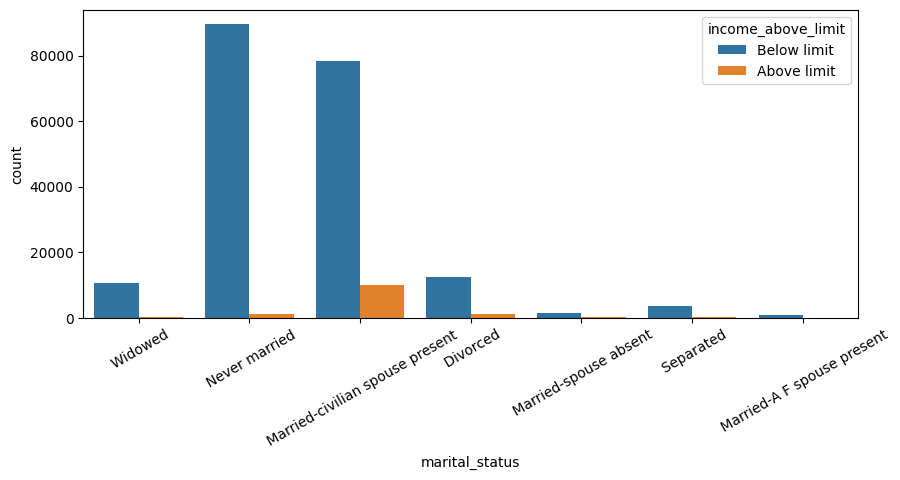

In [23]:
plt.figure(figsize=(10,4))
sns.countplot(x=train.marital_status,hue=train.income_above_limit)
plt.xticks(rotation=30)
plt.show()

**Data Preparation for training**

In [24]:
frames = [train, test]
df = pd.concat(frames)

In [25]:
df.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,total_employed,vet_benefit,gains,losses,stocks_status
count,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000
mean,34.538998,0.176461,55.105027,23.178375,1.956172,1.516498,431.742176,36.849010,195.851259
std,22.318468,0.555240,273.340729,24.404016,2.364857,0.850395,4670.768536,269.789771,1937.847082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,50.000000,0.000000,0.000000,52.000000,4.000000,2.000000,0.000000,0.000000,0.000000
max,90.000000,2.000000,9999.000000,52.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000


In [26]:
from sklearn.preprocessing import LabelEncoder
x = LabelEncoder()
df['gender']=x.fit_transform(df['gender'])
df['marital_status']=x.fit_transform(df['marital_status'])
df['citizenship']=x.fit_transform(df['citizenship'])
df['household_summary']=x.fit_transform(df['household_summary'])
df['tax_status']=x.fit_transform(df['tax_status'])
df['employment_commitment']=x.fit_transform(df['employment_commitment'])
df['race']=x.fit_transform(df['race'])
df['education']=x.fit_transform(df['education'])
df['is_hispanic']=x.fit_transform(df['is_hispanic'])
df['industry_code_main']=x.fit_transform(df['industry_code_main'])
df['class']=x.fit_transform(df['class'])
df['education_institute']=x.fit_transform(df['education_institute'])
df['unemployment_reason']=x.fit_transform(df['unemployment_reason'])
df['is_labor_union']=x.fit_transform(df['is_labor_union'])
df['occupation_code_main']=x.fit_transform(df['occupation_code_main'])
df['under_18_family']=x.fit_transform(df['under_18_family'])
df['residence_1_year_ago']=x.fit_transform(df['residence_1_year_ago'])
df['old_residence_state']=x.fit_transform(df['old_residence_state'])
df.income_above_limit[df.income_above_limit == 'Below limit'] = 0
df.income_above_limit[df.income_above_limit == 'Above limit'] = 1

<ipython-input-26-7c6940145acf>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.income_above_limit[df.income_above_limit == 'Below limit'] = 0
<ipython-input-26-7c6940145acf>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.income_above_limit[df.income_above_limit == 'Above limit'] = 1


In [34]:
train = df.iloc[:209499,:]
test = df.iloc[209499:,:]
xtrain = train.drop(['income_above_limit'], axis=1)
ytrain = train['income_above_limit']
xtest = test
xtest = test.drop(['income_above_limit'], axis=1)

In [35]:
xtest.head()

,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,...,household_summary,under_18_family,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,residence_1_year_ago,old_residence_state
0,54,1,12,3,2,2,4,0,0,5,...,4,4,2,2,0,0,0,4,1,50
1,53,1,4,3,2,2,4,1,1,5,...,4,4,2,2,0,0,0,0,2,50
2,42,1,9,3,2,2,4,0,1,5,...,4,4,2,2,15024,0,500,4,2,50
3,16,0,6,8,1,4,4,0,0,5,...,2,0,2,5,0,0,0,4,1,50
4,16,1,6,8,1,4,4,0,2,5,...,2,0,2,4,0,0,0,4,2,50


In [36]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
col= ['age','wage_per_hour','employment_stat','working_week_per_year','total_employed','vet_benefit','gains','losses','stocks_status']
xtrain[col] = s.fit_transform(xtrain[col])
xtest[col] = s.fit_transform(xtest[col])

In [37]:
xtest.head()

,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,...,household_summary,under_18_family,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,residence_1_year_ago,old_residence_state
0,0.868788,1,12,3,2,2,4,0,0,5,...,4,4,0.567511,2,-0.091526,-0.137007,-0.105035,4,1,50
1,0.824036,1,4,3,2,2,4,1,1,5,...,4,4,0.567511,2,-0.091526,-0.137007,-0.105035,0,2,50
2,0.331773,1,9,3,2,2,4,0,1,5,...,4,4,0.567511,2,3.167130,-0.137007,0.158970,4,2,50
3,-0.831760,0,6,8,1,4,4,0,0,5,...,2,0,0.567511,5,-0.091526,-0.137007,-0.105035,4,1,50
4,-0.831760,1,6,8,1,4,4,0,2,5,...,2,0,0.567511,4,-0.091526,-0.137007,-0.105035,4,2,50


In [38]:
ytrain=ytrain.astype('int')

**Appyling Random Forest Classifier**

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2000)
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=2000)

In [39]:
predictions=rf.predict(xtest)

In [40]:
import sys

In [41]:
np.set_printoptions(threshold=sys.maxsize)
print(predictions)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 

In [42]:
ytest = pd.read_csv('results.csv')

In [43]:
ytest = ytest.drop(['ID'],axis=1)

In [44]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model:', round(accuracy_score(ytest,predictions)*100,2))

Accuracy of the model: 97.92
